# HRS Spectrometer Neural Network Model
- [ ] add auto feature detection
- [ ] auto generate the data

In [10]:
import  pandas as pd
import numpy as np
import sklearn
import math
import matplotlib
%matplotlib inline
import urllib

## Prepare the data
| dataset | Coord | Intro                                                                                    | baseDir                                                                       |
| ------- | ----- | ---------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------- |
| 1       | focal | \- focal plane coord<br>\- only x,y,theta,phi<br>\- used for Deep Neural Network | [http://216.197.71.44/Data/spectro_nn/focalPlane/EqEvt731/](http://216.197.71.44/Data/spectro_nn/focalPlane/EqEvt731/order0/) |
| 2       | det plane | \- detector plane coord<br>\- used for Deep Neural Network<br>\- **equal** event number | [http://216.197.71.44/Data/spectro_nn/DetPlane/EqEvt731/](http://localhost/Data/spectro_nn/DetPlane/EqEvt731/) |
| 3       | det plane | \- detector plane coord<br>\- used for Deep Neural Network<br>\- **Unequal** event number | [http://216.197.71.44/Data/spectro_nn/DetPlane/UnEqEvt731/](http://localhost/Data/spectro_nn/DetPlane/UnEqEvt731/) |

- **Two type of dataset**
Only x,y,theta,phi : PRex_DataSet_xxx.csv
All the combinations: PRex_DataSet_Ful_xxx.csv
### 1). Load the files

In [11]:
dataSouceBaseDir = "http://localhost/Data/spectro_nn/focalPlane/Equal/EqEvt731/order7_ep5"

files = ["{}/PRex_DataSet_Full_2239.csv".format(dataSouceBaseDir),
         "{}/PRex_DataSet_Full_2240.csv".format(dataSouceBaseDir),
         "{}/PRex_DataSet_Full_2241.csv".format(dataSouceBaseDir),
         "{}/PRex_DataSet_Full_2244.csv".format(dataSouceBaseDir),
         "{}/PRex_DataSet_Full_2245.csv".format(dataSouceBaseDir),
         "{}/PRex_DataSet_Full_2256.csv".format(dataSouceBaseDir),
         "{}/PRex_DataSet_Full_2257.csv".format(dataSouceBaseDir)
         ]

li = []

for filename in files:
    print("Loading the file {}...".format(filename))
    df = pd.read_csv(filename)
    li.append(df)
data = pd.concat(li)
data.sample(frac=1) # sample the data with fraction 1. rearrange the data in random order
data.head()

Loading the file http://localhost/Data/spectro_nn/focalPlane/Equal/EqEvt731/order7_ep5/PRex_DataSet_Full_2239.csv...
Loading the file http://localhost/Data/spectro_nn/focalPlane/Equal/EqEvt731/order7_ep5/PRex_DataSet_Full_2240.csv...
Loading the file http://localhost/Data/spectro_nn/focalPlane/Equal/EqEvt731/order7_ep5/PRex_DataSet_Full_2241.csv...
Loading the file http://localhost/Data/spectro_nn/focalPlane/Equal/EqEvt731/order7_ep5/PRex_DataSet_Full_2244.csv...
Loading the file http://localhost/Data/spectro_nn/focalPlane/Equal/EqEvt731/order7_ep5/PRex_DataSet_Full_2245.csv...
Loading the file http://localhost/Data/spectro_nn/focalPlane/Equal/EqEvt731/order7_ep5/PRex_DataSet_Full_2256.csv...
Loading the file http://localhost/Data/spectro_nn/focalPlane/Equal/EqEvt731/order7_ep5/PRex_DataSet_Full_2257.csv...


,evtID,runID,CutID,SieveRowID,SieveColID,bpmX,bpmY,x0th0y0ph0,x0th0y0ph1,x0th0y0ph2,...,x5th0y0ph2,x5th0y1ph0,x5th0y1ph1,x5th0y2ph0,x5th1y0ph0,x5th1y0ph1,x5th1y1ph0,x5th2y0ph0,targCalTh,targCalPh
0,0,2239,136,3,5,0.003794,-0.000501,1,-0.001618,0.000003,...,-1.697790e-15,-7.178800e-12,1.161370e-14,-7.944340e-14,-3.578030e-13,5.788460e-16,-3.959590e-15,-1.973520e-16,-0.000817,-0.010117
1,1,2239,130,4,4,0.003794,-0.000501,1,-0.009000,0.000081,...,-1.256750e-12,-1.320960e-10,1.188850e-12,-1.124610e-12,1.040980e-10,-9.368730e-13,8.862530e-13,-6.984120e-13,0.019571,-0.012569
2,2,2239,179,4,11,0.003794,-0.000501,1,0.014969,0.000224,...,-1.176280e-13,7.695500e-12,1.151930e-13,-1.128090e-13,3.379450e-12,5.058660e-14,-4.953960e-14,-2.175510e-14,0.012775,0.014835
3,3,2239,142,2,6,0.003794,-0.000501,1,0.001385,0.000002,...,-2.741670e-16,-4.317140e-13,-5.979890e-16,-1.304280e-15,-7.994270e-13,-1.107330e-15,-2.415200e-15,-4.472350e-15,-0.014409,-0.003863
4,4,2239,127,1,4,0.003794,-0.000501,1,-0.004135,0.000017,...,-8.401650e-19,-5.949410e-16,2.460070e-18,-7.203310e-18,-3.169040e-16,1.310390e-18,-3.836950e-18,-2.043810e-18,-0.021206,-0.012569


### 2). Check the Theoretical Value of $\theta$ and $\phi$ on targe

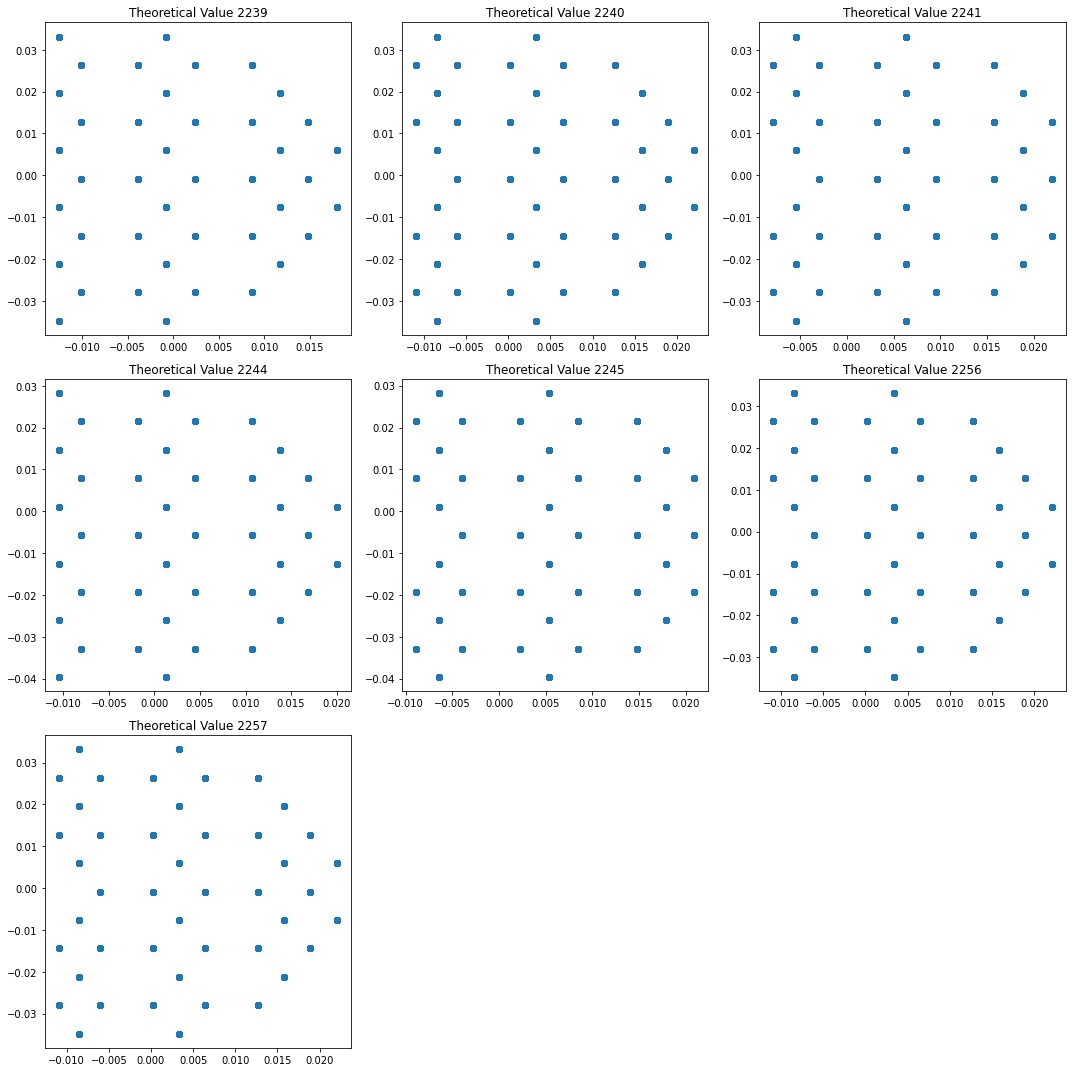

In [12]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=[15,15])
gs = gridspec.GridSpec(nrows=3, ncols=3, height_ratios=[1, 1, 1])

ax0 = fig.add_subplot(gs[0, 0])
ax0.scatter(data[data.runID.eq(2239)]["targCalPh"],data[data.runID.eq(2239)]["targCalTh"])
ax0.set_title('Theoretical Value 2239')

ax1 = fig.add_subplot(gs[0, 1])
ax1.scatter(data[data.runID.eq(2240)]["targCalPh"],data[data.runID.eq(2240)]["targCalTh"])
ax1.set_title('Theoretical Value 2240')

ax2 = fig.add_subplot(gs[0, 2])
ax2.scatter(data[data.runID.eq(2241)]["targCalPh"],data[data.runID.eq(2241)]["targCalTh"])
ax2.set_title('Theoretical Value 2241')

ax3 = fig.add_subplot(gs[1, 0])
ax3.scatter(data[data.runID.eq(2244)]["targCalPh"],data[data.runID.eq(2244)]["targCalTh"])
ax3.set_title('Theoretical Value 2244')

ax4 = fig.add_subplot(gs[1, 1])
ax4.scatter(data[data.runID.eq(2245)]["targCalPh"],data[data.runID.eq(2245)]["targCalTh"])
ax4.set_title('Theoretical Value 2245')

ax5 = fig.add_subplot(gs[1, 2])
ax5.scatter(data[data.runID.eq(2256)]["targCalPh"],data[data.runID.eq(2256)]["targCalTh"])
ax5.set_title('Theoretical Value 2256')

ax6 = fig.add_subplot(gs[2, 0])
ax6.scatter(data[data.runID.eq(2257)]["targCalPh"],data[data.runID.eq(2257)]["targCalTh"])
ax6.set_title('Theoretical Value 2257')

plt.tight_layout()
plt.show()

### 3). Pre-process the data

In [13]:
from sklearn.model_selection import train_test_split
from torch.utils.data import  Dataset, TensorDataset, DataLoader
import torch


train_X, test_X, train_y, test_y = train_test_split(
    data.drop(labels=['evtID','runID','SieveRowID','SieveColID','CutID','bpmX','bpmY','targCalTh','targCalPh'], axis=1),
    data[['targCalTh','targCalPh']],
    test_size=0.2,
    random_state=0)

batchSize = 1

train_X_tensor = torch.tensor(train_X.to_numpy()).float()
train_yTh_tensor = torch.tensor(train_y['targCalTh'].to_numpy()).float()
train_yPh_tensor = torch.tensor(train_y['targCalPh'].to_numpy()).float()

test_X_tensor  = torch.tensor(test_X.to_numpy()).float()
test_yTh_tensor  = torch.tensor(test_y['targCalTh'].to_numpy()).float()
test_yPh_tensor  = torch.tensor(test_y['targCalPh'].to_numpy()).float()

train_theta_loader = DataLoader(dataset=TensorDataset(train_X_tensor,train_yTh_tensor),batch_size=batchSize)
train_phi_loader   = DataLoader(dataset=TensorDataset(train_X_tensor,train_yPh_tensor),batch_size=batchSize)

test_theta_loader = DataLoader(dataset=TensorDataset(test_X_tensor,test_yTh_tensor),batch_size=batchSize)
test_phi_loader   = DataLoader(dataset=TensorDataset(test_X_tensor,test_yPh_tensor),batch_size=batchSize)

n_feature = train_X.shape[1]

## Build the model and Get the GPUs

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class OptNet(nn.Module):
    def __init__(self):
        super(OptNet,self).__init__()
        #TODO model, need to auto adapt to the training dataset
        self.fc1 = nn.Linear(n_feature, n_feature)  # 6*6 from image dimension
        self.output = nn.Linear(n_feature, 1)

    def forward(self, x):
        x = F.sigmoid(self.fc1(x))
        x = self.output(x)
        return x

class OptNetTh(nn.Module):
    def __init__(self):
        super(OptNetTh,self).__init__()
        #TODO model, need to auto adapt to the training dataset
        self.fc1 = nn.Linear(n_feature, n_feature)  # 6*6 from image dimension
        self.output = nn.Linear(n_feature, 1)

    def forward(self, x):
        x = F.sigmoid(self.fc1(x))
        x = self.output(x)
        return x

class OptNetPh(nn.Module):
    def __init__(self):
        super(OptNetPh,self).__init__()
        #TODO model, need to auto adapt to the training dataset
        self.fc1 = nn.Linear(n_feature, n_feature)  # 6*6 from image dimension
        self.output = nn.Linear(n_feature, 1)

    def forward(self, x):
        x = F.sigmoid(self.fc1(x))
        x = self.output(x)
        return x


## Train the model